## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import scipy.stats as stats
from math import sqrt
import numpy as np
from numbers import Number
from math import sqrt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import folium
df = pd.read_csv('data/kc_house_data.csv')
df_names = pd.read_table('data/column_names.md')

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:

import geopandas as gpd 
from shapely.geometry import Point,Polygon
%matplotlib inline 
import numpy as np
import datetime as dt
from sklearn import metrics
from sklearn import linear_model
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


ModuleNotFoundError: No module named 'geopandas'

In [ ]:
map = df 
map_2 = gpd.GeoDataFrame(map,geometry=gpd.points_from_xy(map.lat,map.long))

In [ ]:
zip_code_test = map_2[['zipcode','geometry']][:20]

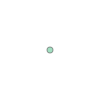

In [ ]:
zip_code_test['geometry'][1]

In [ ]:
#date is the date the house was sold 

In [ ]:
df["date"]=pd.to_datetime(df['date'])

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
import folium
lat = df['lat'].iloc[:600]
long = df['long'].iloc[:600]
price = df['price'].iloc[:600]

#Create a map of the area
base_map = folium.Map([lat.mean(), long.mean()], zoom_start=13)
i=0
for lat1,long1 in zip(lat,long):
     popup_text = 'Lat: {} \n Long: {}'.format(lat1,long1) #Modify this to change marker popup
     popup = folium.Popup(popup_text, parse_html=True)
     marker = folium.Marker(location=[lat1, long1], popup = popup)
     marker.add_to(base_map)
     i+=1
     
base_map

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:

#test = df[['price','zipcode','sqft_living','grade','bedrooms','bathrooms']].copy()
#test.dropna(inplace=True)
#test.sort_values(by='price',ascending = False)


In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

In [9]:
df['grade'].unique()

array(['7 Average', '8 Good', '11 Excellent', '9 Better', '6 Low Average',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [10]:
df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [11]:
df_new = df.drop(columns=['sqft_above','sqft_living15','sqft_lot15','grade','id','sqft_basement'])

In [12]:
df_new['yr_renovated']= df_new['yr_renovated'].astype(int)

In [13]:
df_new['yr_renovated'].value_counts()

0       15111
2014       64
2013       29
2005       27
2000       25
        ...  
1967        1
1934        1
1944        1
1950        1
1974        1
Name: yr_renovated, Length: 70, dtype: int64

In [14]:
df_new

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,1951,1991,98125,47.7210,-122.319
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,1965,0,98136,47.5208,-122.393
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,1987,0,98074,47.6168,-122.045
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,2001,0,98053,47.6561,-122.005
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,1995,0,98003,47.3097,-122.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,Average,2008,0,98116,47.5773,-122.409
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,2009,0,98103,47.6993,-122.346
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,2014,0,98146,47.5107,-122.362
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,2009,0,98144,47.5944,-122.299


In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          15762 non-null  object 
 1   price         15762 non-null  float64
 2   bedrooms      15762 non-null  int64  
 3   bathrooms     15762 non-null  float64
 4   sqft_living   15762 non-null  int64  
 5   sqft_lot      15762 non-null  int64  
 6   floors        15762 non-null  float64
 7   waterfront    15762 non-null  object 
 8   view          15762 non-null  object 
 9   condition     15762 non-null  object 
 10  yr_built      15762 non-null  int64  
 11  yr_renovated  15762 non-null  int64  
 12  zipcode       15762 non-null  int64  
 13  lat           15762 non-null  float64
 14  long          15762 non-null  float64
dtypes: float64(5), int64(6), object(4)
memory usage: 1.9+ MB


In [16]:
#DEFINE the catgory coulmns unique values to transfer them to dummy columns 
df_new['waterfront'].unique()


array(['NO', 'YES'], dtype=object)

In [17]:
df_new['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [18]:
#col.f <- factor(column,
            #levels = c("Poor","Fair" , "Good" , "Very Good", "Excellent"),
           # labels = c("Poor","Fair" , "Good" , "Very Good", "Excellent"),
            #ordered = TRUE)

In [19]:
df_new['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [20]:
#ASK ALEX IF YOU CAN RE SORT THE VAULES IN THE CATGORIES COULMN AS ABOVE 

In [21]:
#switched the catgries coulmns to numeric! 

In [22]:
for col_1 in ['waterfront','view','condition']:
    df_new[col_1] = df_new[col_1].astype('category')

In [23]:
for col_1 in ['waterfront','view','condition']:
    df_new[col_1] = df_new[col_1].cat.codes
    

In [24]:
df_new['view'].unique()
#VIEW = NONE:4,GOOD:3,EXCELLENT:1,AVERAGE:0,FAIR:2

array([4, 3, 1, 0, 2], dtype=int8)

In [25]:
df_new.sort_values(by = 'view')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long
1842,4/13/2015,580000.0,3,2.50,1740,1280,3.0,0,0,0,2008,0,98116,47.5890,-122.387
10588,9/9/2014,783200.0,4,2.00,1590,5400,1.0,0,0,0,1900,0,98119,47.6370,-122.367
20749,5/11/2015,770000.0,5,3.50,4750,8234,2.0,0,0,0,2013,0,98198,47.3574,-122.318
14734,5/27/2014,967500.0,3,3.75,3250,5797,2.0,0,0,2,1951,0,98199,47.6481,-122.405
10581,10/16/2014,951250.0,5,3.00,2710,8227,1.0,0,0,0,1953,0,98199,47.6505,-122.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7598,2/19/2015,518000.0,4,3.00,2430,11670,1.0,0,4,2,1978,0,98034,47.7307,-122.228
7600,2/26/2015,430000.0,3,2.50,1690,1310,2.0,0,4,0,2004,0,98136,47.5404,-122.387
7603,11/7/2014,449000.0,3,1.75,1270,6600,1.5,0,4,4,1903,0,98144,47.5976,-122.295
7583,7/14/2014,390000.0,3,2.25,1640,2875,2.0,0,4,0,1983,0,98118,47.5686,-122.286


In [26]:
df_new['waterfront'].unique()
##WATERFRONT = 0:NO 1:YES 

array([0, 1], dtype=int8)

In [27]:
df_new['condition'].unique()
#['Average':0, 'Very Good':4, 'Good':2, 'Poor':3, 'Fair':1]



array([0, 4, 2, 3, 1], dtype=int8)

In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          15762 non-null  object 
 1   price         15762 non-null  float64
 2   bedrooms      15762 non-null  int64  
 3   bathrooms     15762 non-null  float64
 4   sqft_living   15762 non-null  int64  
 5   sqft_lot      15762 non-null  int64  
 6   floors        15762 non-null  float64
 7   waterfront    15762 non-null  int8   
 8   view          15762 non-null  int8   
 9   condition     15762 non-null  int8   
 10  yr_built      15762 non-null  int64  
 11  yr_renovated  15762 non-null  int64  
 12  zipcode       15762 non-null  int64  
 13  lat           15762 non-null  float64
 14  long          15762 non-null  float64
dtypes: float64(5), int64(6), int8(3), object(1)
memory usage: 1.6+ MB


In [29]:
df_new.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,4,0,1951,1991,98125,47.7210,-122.319
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,4,4,1965,0,98136,47.5208,-122.393
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,4,0,1987,0,98074,47.6168,-122.045
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0,4,0,2001,0,98053,47.6561,-122.005
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0,4,0,1995,0,98003,47.3097,-122.327


In [30]:
df_new.corr()["price"]

price           1.000000
bedrooms        0.305489
bathrooms       0.526155
sqft_living     0.706189
sqft_lot        0.084504
floors          0.259505
waterfront      0.274212
view           -0.313494
condition       0.021681
yr_built        0.049345
yr_renovated    0.122731
zipcode        -0.049502
lat             0.306607
long            0.021215
Name: price, dtype: float64

In [31]:
df_new['price'].describe()
#THERE ARE 129 HOUSES IN THE MAX PRICE IN THE PRICE OF $77,00000.0
# the cheapest house is $82,000
#THE MEAN IS $5.4 


count    1.576200e+04
mean     5.413172e+05
std      3.722258e+05
min      8.200000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.448750e+05
max      7.700000e+06
Name: price, dtype: float64

In [32]:
df_new['yr_built'].describe()

count    15762.000000
mean      1971.111217
std         29.336823
min       1900.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [33]:
df_new['yr_renovated'].value_counts() ###need to do only above year 2000 via year built via zip code via price ##

0       15111
2014       64
2013       29
2005       27
2000       25
        ...  
1967        1
1934        1
1944        1
1950        1
1974        1
Name: yr_renovated, Length: 70, dtype: int64

In [34]:
#df.loc[df['alcohol'] < 12]
df_new.loc[df_new['yr_renovated']>2000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long
35,6/13/2014,696000.0,3,2.50,2300,3060,1.5,0,4,0,1930,2002,98115,47.6827,-122.310
103,10/7/2014,1090000.0,3,2.50,2920,8113,2.0,0,4,0,1950,2010,98004,47.5814,-122.196
158,11/13/2014,247000.0,3,2.00,1270,7198,1.5,0,4,0,1916,2013,98022,47.2086,-121.996
237,3/20/2015,410000.0,4,1.00,1970,4740,1.5,0,4,0,1904,2005,98122,47.6136,-122.303
274,11/24/2014,331000.0,3,1.75,1080,1306,1.0,0,4,0,1954,2003,98199,47.6601,-122.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19577,11/4/2014,257000.0,3,1.75,1397,18000,1.0,0,4,0,1965,2014,98092,47.3388,-122.166
19602,7/12/2014,451000.0,2,1.00,900,6000,1.0,0,4,0,1944,2004,98115,47.6855,-122.289
20041,9/4/2014,434900.0,3,2.00,1520,5040,2.0,0,4,0,1977,2006,98177,47.7770,-122.362
20428,2/25/2015,500012.0,4,2.50,2400,9612,1.0,0,4,0,1962,2009,98059,47.4799,-122.127


In [35]:
#CHECKING LINER REGERSSION 

In [36]:
df_numeric = df_new.groupby(['zipcode']).mean()
# once i groupby the zip code the data normalize 


In [37]:
df_numeric.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,lat,long
zipcode,,,,,,,,,,,,,
98001,2.716920e+05,3.352941,1.995098,1861.109804,14461.015686,1.401961,0.000000,3.913725,0.709804,1980.482353,31.227451,47.308339,-122.269933
98002,2.339240e+05,3.295302,1.832215,1611.577181,7450.489933,1.332215,0.000000,4.000000,1.449664,1968.107383,66.677852,47.309665,-122.212725
98003,2.882728e+05,3.336406,2.048387,1905.082949,10471.493088,1.315668,0.000000,3.691244,0.718894,1977.963134,9.267281,47.316278,-122.309535
98004,1.367456e+06,3.896104,2.577922,2969.480519,13321.523810,1.467532,0.004329,3.614719,1.012987,1971.476190,225.051948,47.615404,-122.204762
98005,8.131688e+05,3.860465,2.391473,2672.868217,19480.891473,1.244186,0.000000,3.868217,1.434109,1967.883721,46.472868,47.611235,-122.168039


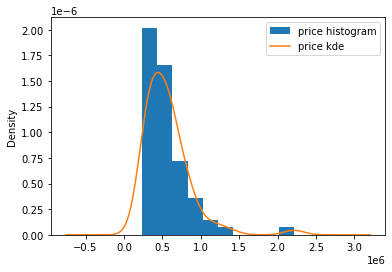

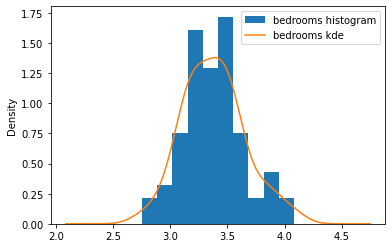

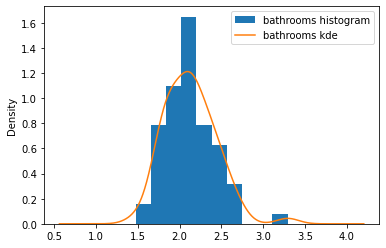

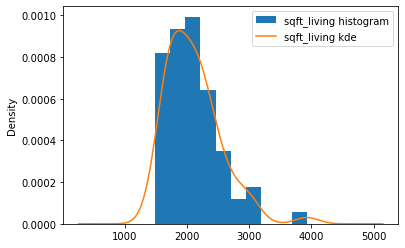

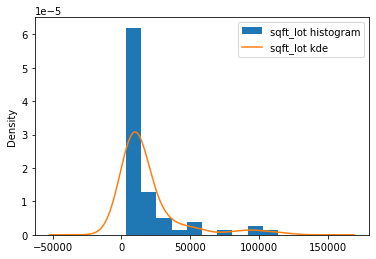

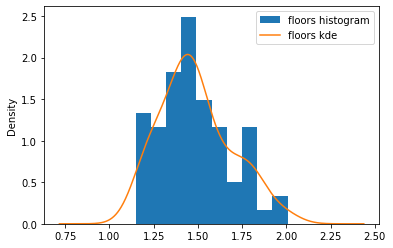

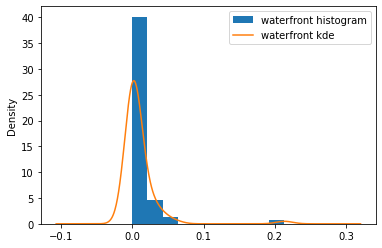

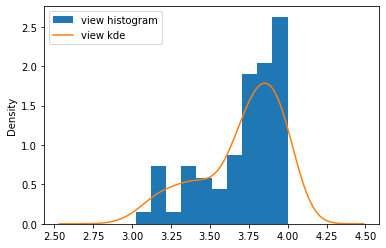

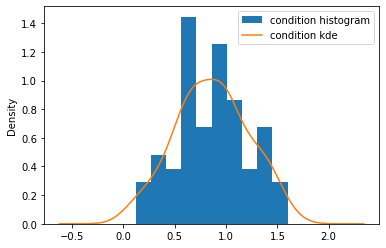

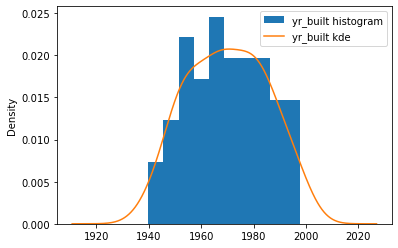

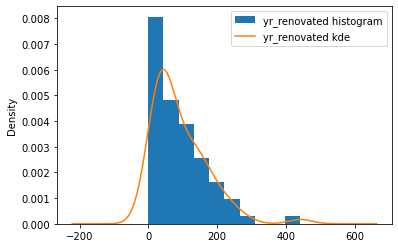

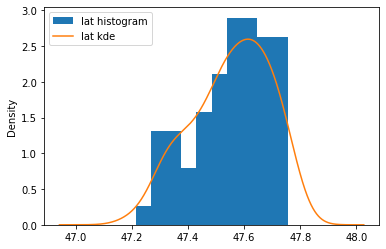

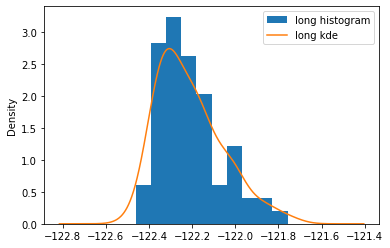

In [38]:
for column in df_numeric:
    df_numeric[column].plot.hist(density=True, label = column + ' histogram')
    df_numeric[column].plot.kde(label = column + ' kde')
    plt.legend()
    plt.show()

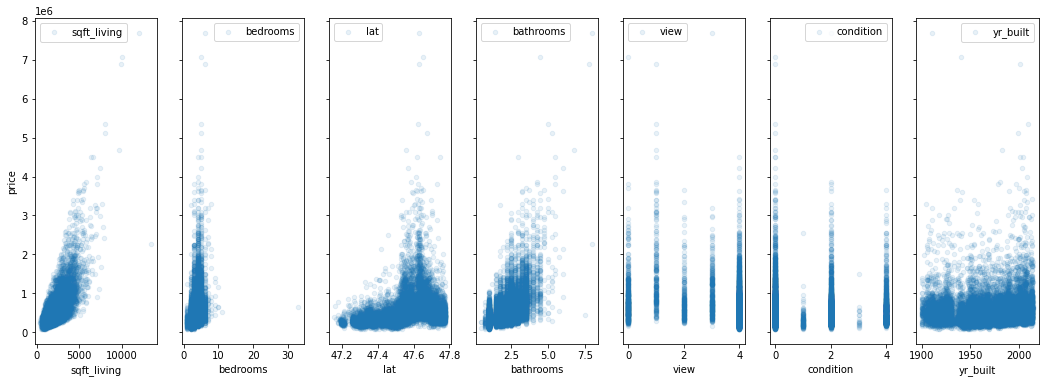

In [43]:
fig, axs = plt.subplots(1, 7, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_living', 'bedrooms', 'lat','bathrooms','view','condition','yr_built']):
    df_new.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel, alpha = 0.1)
plt.legend()
plt.show()

#['Average':0, 'Very Good':4, 'Good':2, 'Poor':3, 'Fair':1]
#VIEW = NONE:4,GOOD:3,EXCELLENT:1,AVERAGE:0,FAIR:2

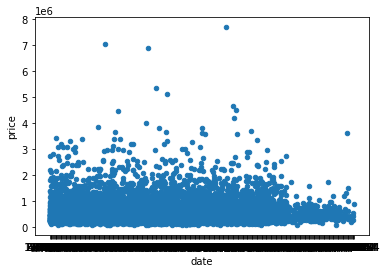

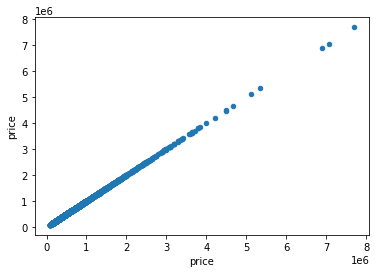

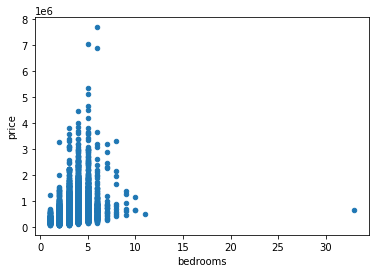

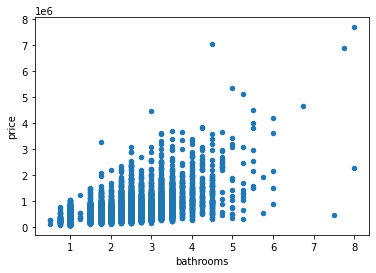

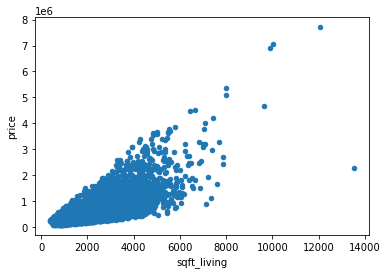

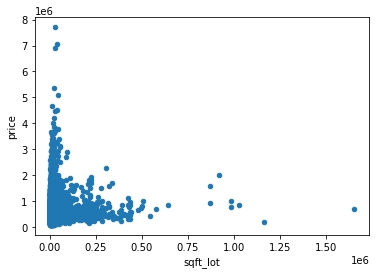

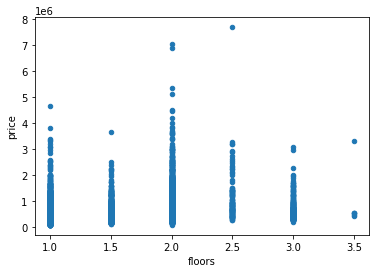

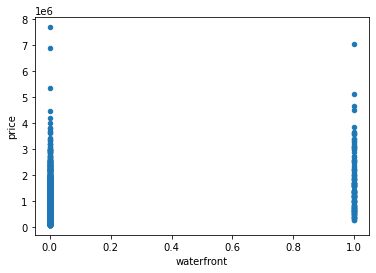

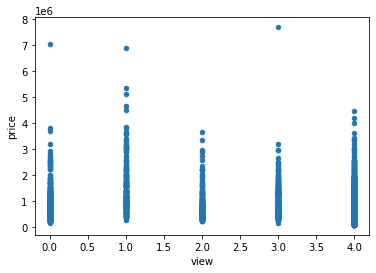

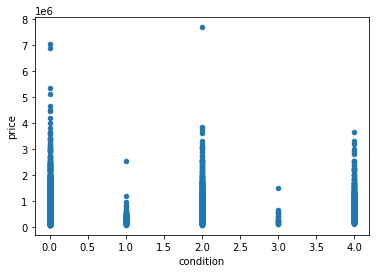

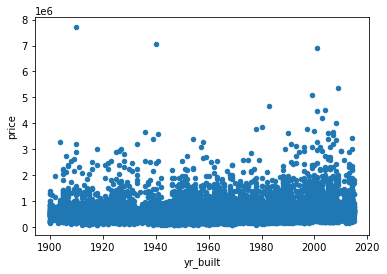

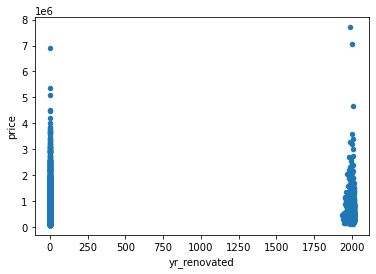

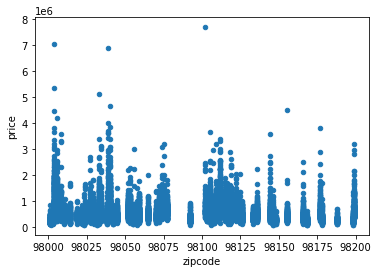

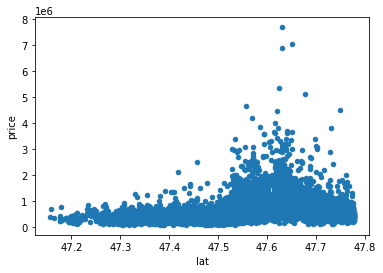

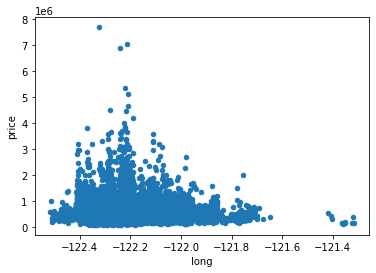

In [76]:
for column in df_new.columns:
    df_new.plot(kind='scatter', x= column, y='price')
    plt.show()

In [83]:
y = df_new['price']
X = sm.add_constant(df_new.drop(columns = 'price'))

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [85]:
model = sm.OLS(y, X).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [86]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     91.49
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           1.16e-32
Time:                        12:14:05   Log-Likelihood:                -878.14
No. Observations:                  70   AIC:                             1782.
Df Residuals:                      57   BIC:                             1812.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.759e+07   1.95e+07      1.417      0.162   -1.14e+07    6.66e+07
bedrooms     -3.882e+05   1.05e+05     -3.686      0.001   -5.99e+05   -1.77e+05
bathrooms     7.932e+05   1.49e+05      5.325      0.000    4.95e+05    1.09e+06
sqft_living    361.0498     90.455      3.991      0.000     179.917     542.183
sqft_lot        -2.1972      0.814     -2.698      0.009      -3.828      -0.566
floors       -2.693e+05   9.56e+04     -2.818      0.007   -4.61e+05   -7.79e+04
waterfront    6.255e+05    4.9e+05      1.276      0.207   -3.56e+05    1.61e+06
view           1.01e+05   5.55e+04      1.818      0.074   -1.02e+04    2.12e+05
condition     6.443e+04   3.74e+04      1.721      0.091   -1.05e+04    1.39e+05
yr_built     -9353.5476   1445.327     -6.472      0.000   -1.22e+04   -6459.331
yr_renovated   687.5725    186.263      3.691      0.001     314.587    1060.558
lat           2.137e+05   8.28e+04      2.582      0.012     4.8e+04    3.79e+05
long          1.633e+05   1.41e+05      1.159      0.251   -1.19e+05    4.45e+05
==============================================================================
Omnibus:                        3.848   Durbin-Watson:                   2.258
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.093
Skew:                           0.359   Prob(JB):                        0.213
Kurtosis:                       3.737   Cond. No.                     6.29e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

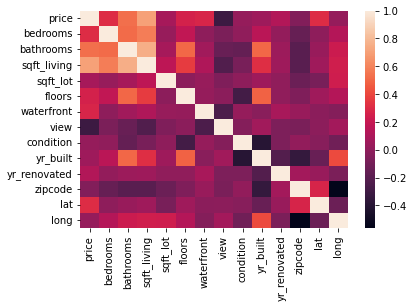

In [89]:
import seaborn as sns
sns.heatmap(df_new.corr())

In [90]:
model_df = df_new.drop(columns = ['bedrooms', 'bathrooms'])

In [91]:
y = model_df['price']
X = sm.add_constant(model_df.drop(columns = 'price'))

model1 = sm.OLS(y, X).fit()

model1.summary()

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [93]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 4 samples/observations and 2 variables/features
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
# the scaler object (model)
scaler = StandardScaler()
# fit and transform the data
scaled_data = scaler.fit_transform(X) 

print(X)
print(scaled_data)

[[0 0]
 [1 0]
 [0 1]
 [1 1]]
[[-1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]]


In [102]:
df_pre = df_new.drop(columns = 'date')

In [103]:
from sklearn import preprocessing

X = preprocessing.scale(df_pre)

In [104]:
df_standard = pd.DataFrame(X, columns = df_pre.columns)

In [106]:
y= df_standard['price']
X = sm.add_constant(df_standard.drop(columns = 'price'))

model = sm.OLS(y, X).fit()




/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     2368.
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:09:16   Log-Likelihood:                -13827.
No. Observations:               15762   AIC:                         2.768e+04
Df Residuals:                   15748   BIC:                         2.779e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.062e-14      0.005   4.45e-12      1.000      -0.009       0.009
bedrooms        -0.1327      0.006    -22.661      0.000      -0.144      -0.121
bathrooms        0.0989      0.008     11.841      0.000       0.082       0.115
sqft_living      0.6849      0.008     86.793      0.000       0.669       0.700
sqft_lot        -0.0040      0.005     -0.814      0.416      -0.013       0.006
floors           0.0603      0.006     10.388      0.000       0.049       0.072
waterfront       0.1626      0.005     33.699      0.000       0.153       0.172
view            -0.0935      0.005    -18.754      0.000      -0.103      -0.084
condition        0.0426      0.005      8.087      0.000       0.032       0.053
yr_built        -0.1507      0.007    -21.208      0.000      -0.165      -0.137
yr_renovated     0.0266      0.005      5.362      0.000       0.017       0.036
zipcode         -0.0989      0.006    -16.712      0.000      -0.111      -0.087
lat              0.2529      0.005     51.279      0.000       0.243       0.263
long            -0.0946      0.006    -15.761      0.000      -0.106      -0.083
==============================================================================
Omnibus:                    11588.255   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           711917.465
Skew:                           2.953   Prob(JB):                         0.00
Kurtosis:                      35.390   Cond. No.                         4.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
model.params

const           2.061719e-14
bedrooms       -1.326689e-01
bathrooms       9.885781e-02
sqft_living     6.849463e-01
sqft_lot       -3.953722e-03
floors          6.030368e-02
waterfront      1.625811e-01
view           -9.354748e-02
condition       4.260762e-02
yr_built       -1.507442e-01
yr_renovated    2.661135e-02
zipcode        -9.893091e-02
lat             2.528502e-01
long           -9.464705e-02
dtype: float64